
An introduction to seaborn
==========================

Seaborn is a library for making statistical graphics in Python. It builds on top of `matplotlib <https://matplotlib.org/>`_ and integrates closely with `pandas <https://pandas.pydata.org/>`_ data structures. - We like this!

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

Here's an example of what seaborn can do:

In [3]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

`sns.set_theme()` This uses the matplotlib rcParam system and will affect how all matplotlib plots look, even if you don't make them with seaborn. Beyond the default theme, you can independently control the style and scaling of the plot to quickly translate your work between presentation contexts (e.g., making a version of your figure that will have readable fonts when projected during a talk). If you like the matplotlib defaults or prefer a different theme, you can skip this step and still use the seaborn plotting functions.

Lets start by loading a seaborn data set. Most code in the Tutorial will use the :func:`load_dataset` function to access to an example dataset. There's nothing special about these datasets: they are just pandas dataframes, and we could have loaded them with :func:`pd.read_csv` or built them by hand. Most of the examples in the documentation will specify data using pandas dataframes.

In [ ]:
# Load an example dataset
tips = sns.load_dataset("tips") #this is a pandas DataFrame
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


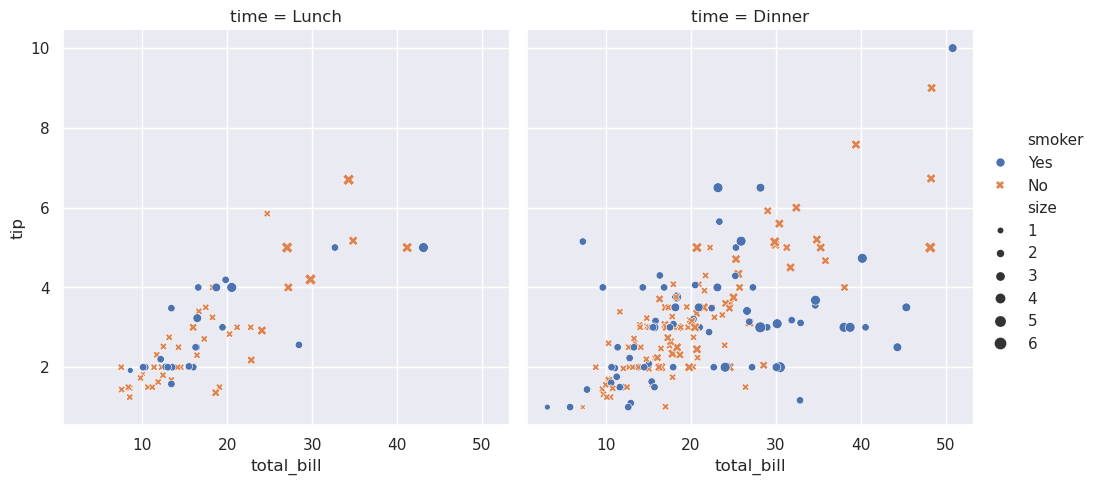

In [5]:
# Create a visualization usin
sns.relplot(
    data=tips,#set the data to the pandas DataFrame we just loaded
    x="total_bill", y="tip", #set the x and y axes to the total_bill and tip columns from our dataframe
    col="time", #create separate plots for each value in the time column (Lunch and Dinner)
    hue="smoker", #set the color of the points based on whether the person is a smoker
    style="smoker", #set the style of the points based on whether the person is a smoker
    size="size", #set the size of the points based on the size of the party
)

This plot shows the relationship between five variables in the tips dataset using a single call to the seaborn function :func:`relplot` (relational plot). We provided only the names of the variables and their roles in the plot. Unlike when using matplotlib directly, it wasn't necessary to specify attributes of the plot elements in terms of the color values or marker codes. Behind the scenes, seaborn handled the translation from values in the dataframe to arguments that matplotlib understands. The declarative approach lets you stay focused on the questions that you want to answer, rather than on the details of how to control matplotlib.

A high-level API for statistical graphics
-----------------------------------------

There is no universally best way to visualize data. Different questions are best answered by different plots. Seaborn makes it easy to switch between different visual representations by using a consistent dataset-oriented API.

The function :func:`relplot` is named that way because it is designed to visualize many different statistical *relationships*. While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line. The :func:`relplot` function has a convenient ``kind`` parameter that lets you easily switch to this alternate representation:

In [6]:
# Load another example dataset
dots = sns.load_dataset("dots") #this is a pandas DataFrame
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


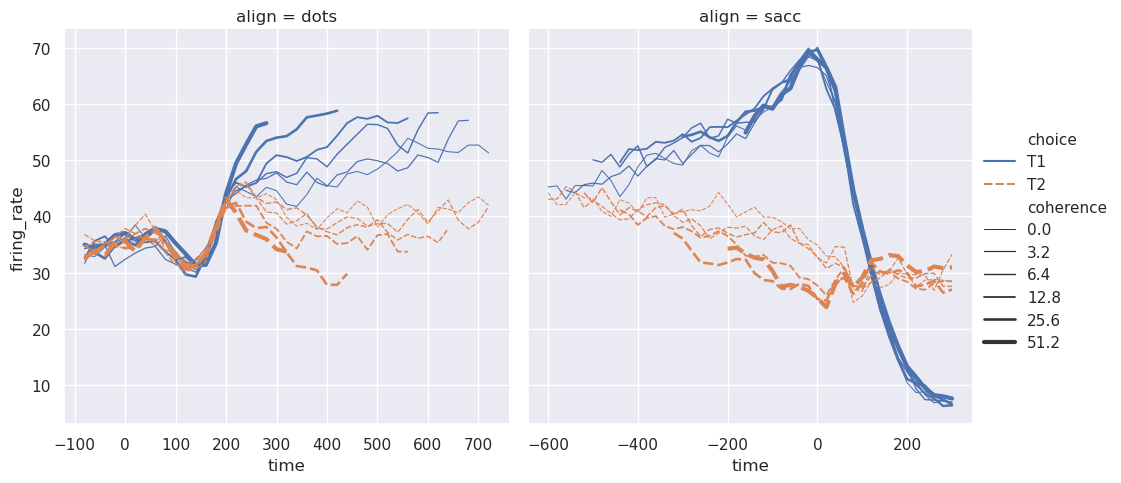

In [8]:
sns.relplot(
    kind="line", #change the kind of plot to a line plot
    data=dots, #set the data to the pandas DataFrame we just loaded
    x="time", y="firing_rate", #set the x and y axes to the time and firing_rate columns from our dataframe
    col="align",#create separate plots for each value in the align column
    hue="choice", size="coherence", style="choice", #set the hue, size, and style based on the choice and coherence columns
    facet_kws=dict(sharex=False), #do not share the x axis between the plots
)

Notice how the ``size`` and ``style`` parameters are used in both the scatter and line plots, but they affect the two visualizations differently: changing the marker area and symbol in the scatter plot vs the line width and dashing in the line plot. We did not need to keep those details in mind, letting us focus on the overall structure of the plot and the information we want it to convey.



## Statistical estimation

Often, we are interested in the *average* value of one variable as a function of other variables. Many seaborn functions will automatically perform the statistical estimation that is necessary to answer these questions:

In [9]:
#load dataset
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


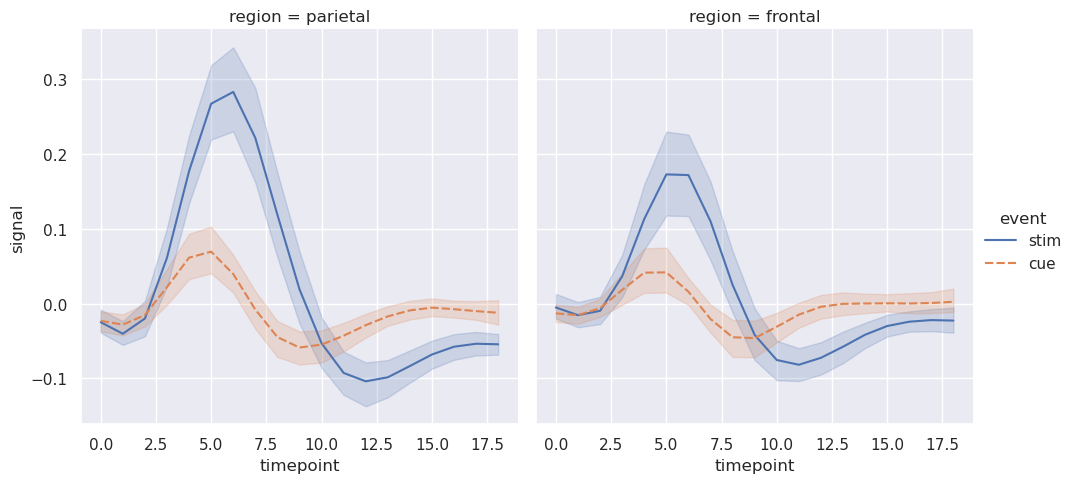

In [ ]:
#make a line plot with fmri data, have the mean form the line and be bounded by a confidence interval
sns.relplot(
    kind="line",#change the kind of plot to a line plot
    data=fmri, #set the data to the pandas DataFrame we just loaded
    x="timepoint", y="signal", #set the x and y axes to the timepoint and signal columns from our dataframe
    col="region",#create separate plots for each value in the region column
    hue="event", #set the hue based on the event column
    style="event", #set the style based on the event column
)

When statistical values are estimated, seaborn will use bootstrapping to compute confidence intervals and draw error bars representing the uncertainty of the estimate.

Statistical estimation in seaborn goes beyond descriptive statistics. For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using :func:`lmplot` (linear model plot):

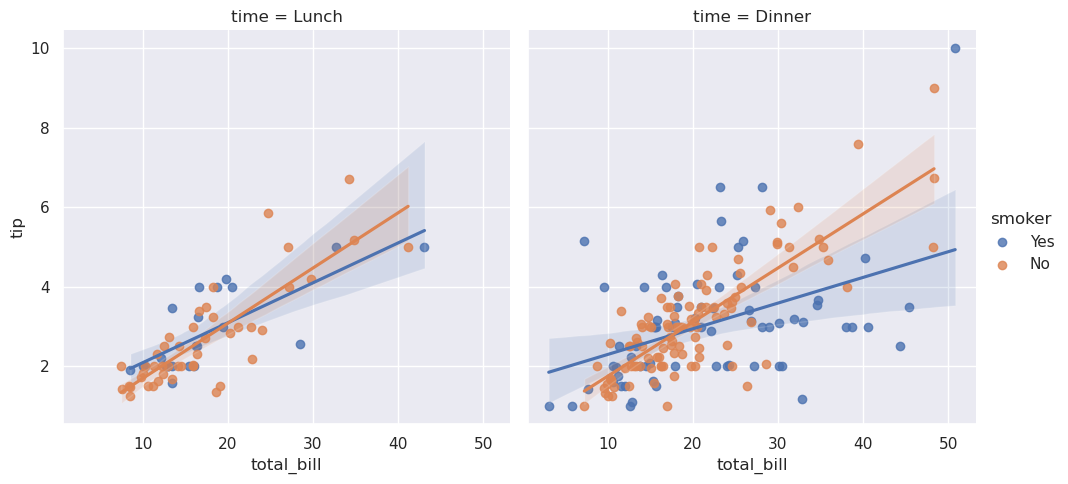

In [ ]:
'''#lets go back to the tips data from the first plots, 
we will use lmplot to fit linear regression models to the data, 
add the regression lines to the plots,
and put confidence intervals around the regression lines.
'''
# Create a linear model plot
sns.lmplot(data=tips, #set the data to the pandas DataFrame we loaded earlier
           x="total_bill", y="tip", #set the x and y axes to the total_bill and tip columns from our dataframe
           col="time",  #create separate plots for each value in the time column
           hue="smoker"#set the hue based on whether the person is a smoker
           ) 

## Distributional representations

Statistical analyses require knowledge about the distribution of variables in your dataset. The seaborn function :func:`displot` (distributions plot) supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

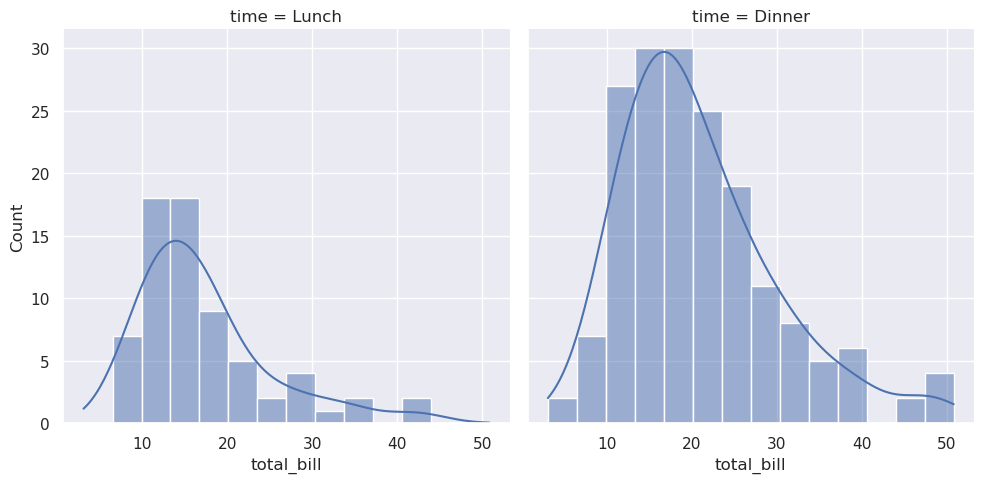

In [12]:
#Use distribution plot to plot the distribution of total_bill amounts for lunch and dinner
sns.displot(data=tips, #set the data to the pandas DataFrame we loaded earlier
            x="total_bill", #set the x axis to the total_bill column from our dataframe
            col="time", #create separate plots for each value in the time column
            kde=True#add a kernel density estimate to the histogram
            )

Seaborn also tries to promote techniques that are powerful but less familiar, such as calculating and plotting the empirical cumulative distribution function of the data:

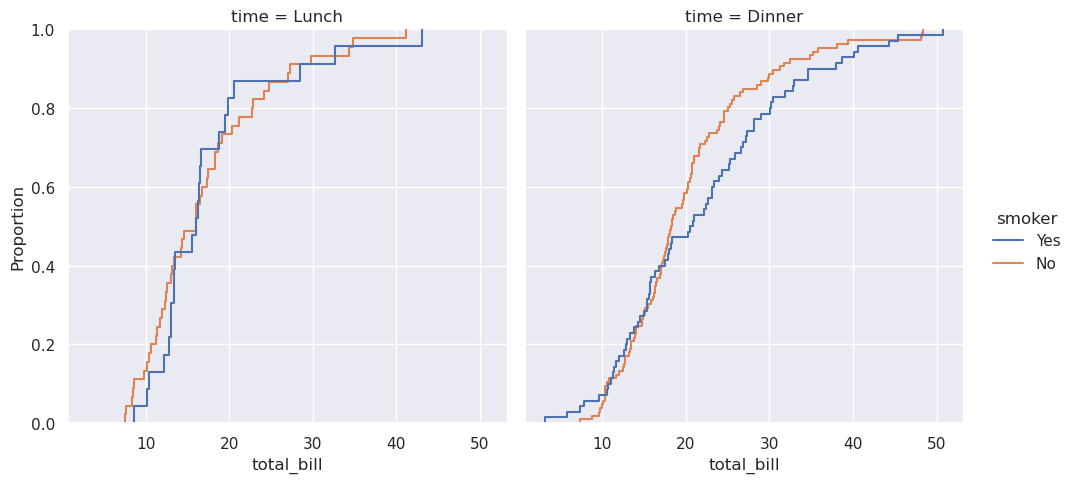

In [ ]:
#the distribution plot can also be used to create  cumulative distribution functions (CDFs)
sns.displot(data=tips, #set the data to the pandas DataFrame we loaded earlier
            kind="ecdf", #change the kind of plot to an empirical cumulative distribution function
            x="total_bill", #set the x axis to the total_bill column from our dataframe
            col="time", #create separate plots for each value in the time column
            hue="smoker", #set the hue based on whether the person is a smoker
            rug=False # change to true to add a rug plot to show individual data points
            )

## Plots for categorical data

Several specialized plot types in seaborn are oriented towards visualizing categorical data. They can be accessed through :func:`catplot` (categorical plot). These plots offer different levels of granularity. At the finest level, you may wish to see every observation by drawing a "swarm" plot: a scatter plot that adjusts the positions of the points along the categorical axis so that they don't overlap:

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


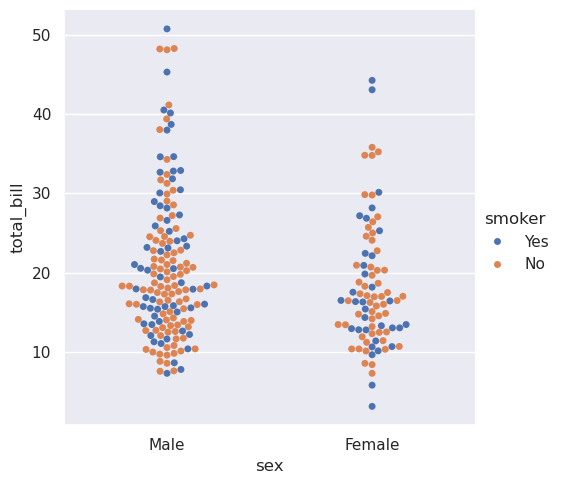

In [ ]:
#Create a categorical plot using a swarm plot to show total bill amounts by day and smoker status

#what other categorical plots are available from this dataset?
sns.catplot(data=tips, #set the data to the pandas DataFrame we loaded earlier
            kind="swarm", #set the kind of plot to a swarm plot
            x="day", y="total_bill",    #set the x and y axes to the day and total_bill columns from our dataframe, day is categorical
            hue="smoker"#set the hue based on whether the person is a smoker
            )

Alternately, you could use kernel density estimation to represent the underlying distribution that the points are sampled from. The sns plots automatically include confidence intervals.

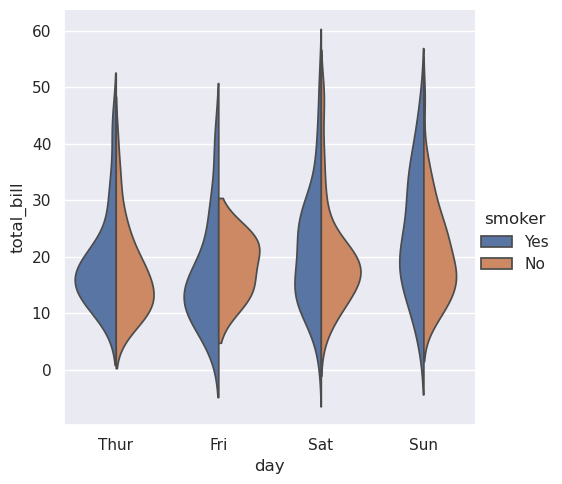

In [ ]:
#Create a violin plot to show the distribution of total bill amounts by day and smoker status
sns.catplot(data=tips, #set the data to the pandas DataFrame we loaded earlier
            kind="violin", #set the kind of plot to a violin plot
            x="day", y="total_bill", #set the x and y axes to the day and total_bill columns from our dataframe, day is categorical
            hue="smoker", #set the hue based on whether the person is a smoker
            split=True, #split the violins to show both smoker and non-smoker distributions
            inner = None #change to "quartiles" to show quartiles inside the violins, or remove to show standard deciation
            )

Or you could show only the mean value and its confidence interval within each nested category:

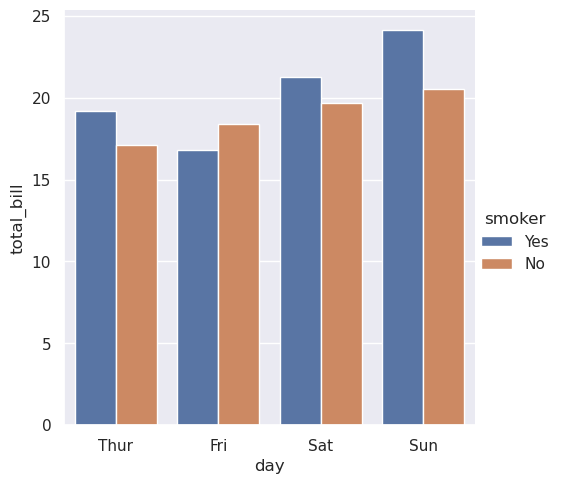

In [ ]:
#Create a bar plot to show the average total bill amounts by day and smoker status
sns.catplot(data=tips,#set the data to the pandas DataFrame we loaded earlier
            kind="bar",#set the kind of plot to a bar plot
            x="day", y="total_bill", #set the x and y axes to the day and total_bill columns from our dataframe, day is categorical
            hue="smoker",#set the hue based on whether the person is a smoker
            errorbar=None #change to "sd" to show standard deviation error bars, or remove to show default confidence interval error bars
            )

## Multivariate views on complex datasets
--------------------------------------

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, :func:`jointplot` (Joint Distribution Plot), focuses on a single relationship. It plots the joint distribution between two variables along with each variable's marginal distribution:

In [31]:
#load penguin dataset
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


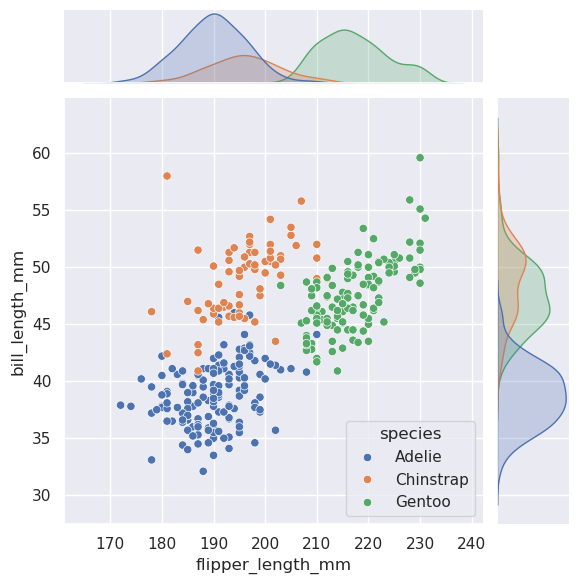

In [ ]:
#create a joint plot to show the relationship between flipper length and bill length, colored by species
sns.jointplot(data=penguins, #set the data to the pandas DataFrame we just loaded
              x="flipper_length_mm", y="bill_length_mm", #set the x and y axes to the flipper_length_mm and bill_length_mm columns from our dataframe
              hue="species" #set the hue based on the species column
              )

The other, :func:`pairplot` (Pairwise Relationship Plot), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each numerical, respectively:

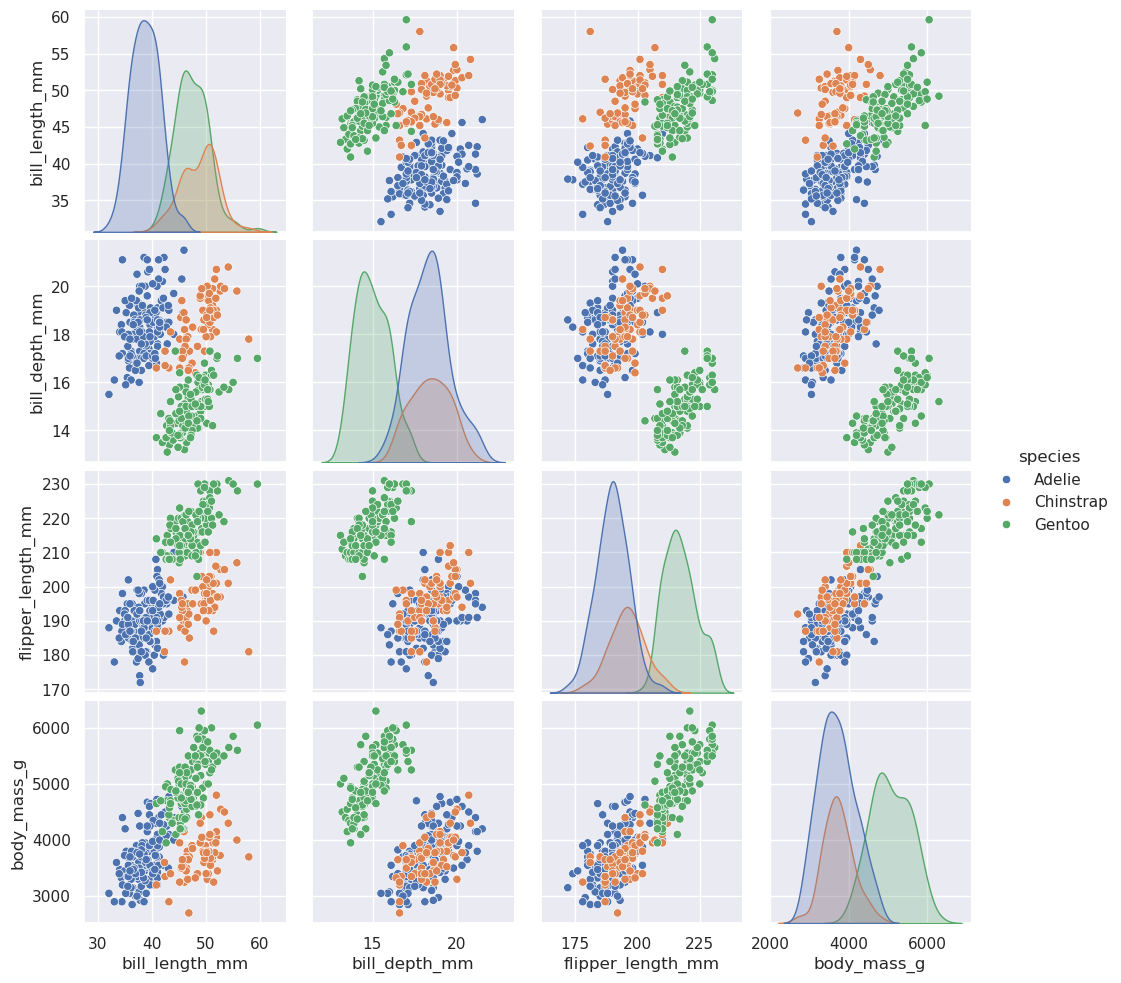

In [ ]:
sns.pairplot(data=penguins, # plot will create a matrix of scatter plots for each pair of numerical variables in the dataset
             hue="species"#set the hue based on the species column
             )

## Lower-level tools for building figures

These tools work by combining :doc:`axes-level` (like Matplotlib) plotting functions with objects that manage the layout of the figure, linking the structure of a dataset to a :doc:`grid of axes`. Both elements are part of the public API, and you can use them directly to create complex figures with only a few more lines of code:

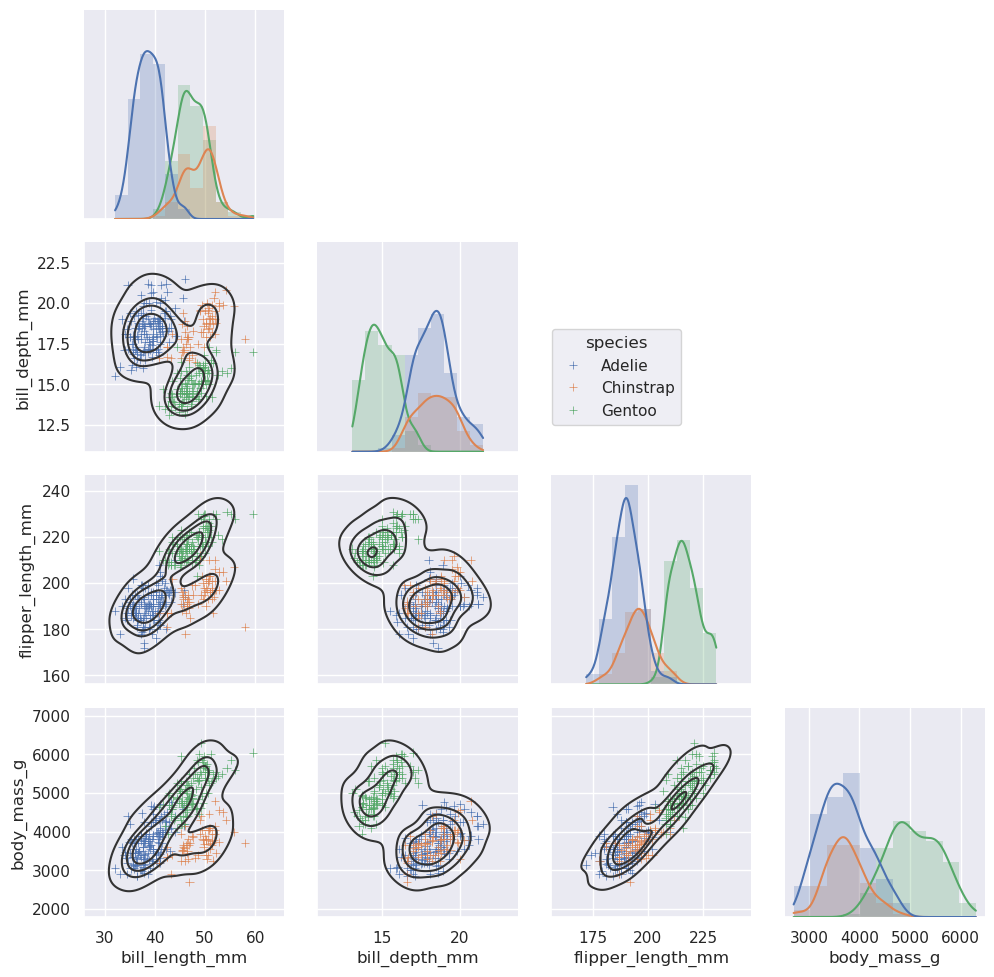

In [33]:
#workflow for creating more customized pair plots using PairGrid
#initialize the PairGrid object
g = sns.PairGrid(penguins, #set the data to the pandas DataFrame we just loaded
                 hue="species", #set the hue based on the species column
                 corner=True #only show lower triangle of the pair grid
                 )
# Use the map_lower to load in the type of plot
g.map_lower(sns.kdeplot, #use kernel density estimate plot
            hue=None,  #disable hue here to avoid issues with multiple contours
            levels=5, #number of contour levels
            color=".2" #set color to a gray value
            )

# Use the map_lower to load in the type of plot
g.map_lower(sns.scatterplot, #use scatter plot
            marker="+" #set marker style to plus sign
            )

# Use the map_diag to load in the type of plot
g.map_diag(sns.histplot, #use histogram plot
           element="step", #set the element style to step to create unfilled histograms
           linewidth=0, #set linewidth to 0 to remove borders
           kde=True #add a kernel density estimate to the histogram
           )
#add the legend
g.add_legend(frameon=True) #add a legend with a frame
g.legend.set_bbox_to_anchor((.61, .6)) #set the position of the legend

## Opinionated defaults and flexible customization
-----------------------------------------------

Seaborn creates complete graphics with a single function call: when possible, its functions will automatically add informative axis labels and legends that explain the semantic mappings in the plot.

In many cases, seaborn will also choose default values for its parameters based on characteristics of the data. For example, the :doc:`color mappings` that we have seen so far used distinct hues (blue, orange, and sometimes green) to represent different levels of the categorical variables assigned to ``hue``. When mapping a numeric variable, some functions will switch to a continuous gradient:

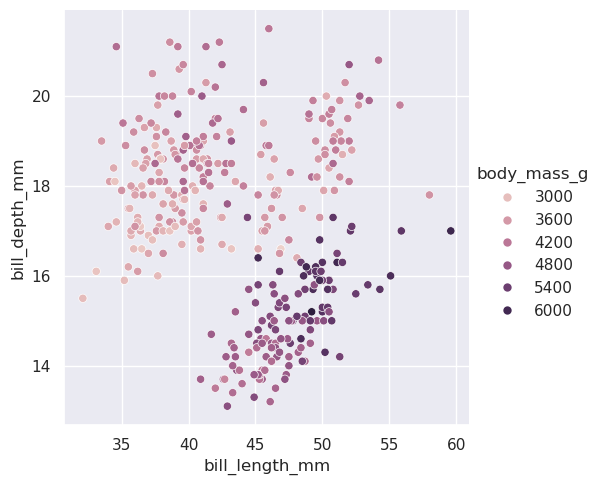

In [ ]:
#create a relational plot to show the relationship between bill length and bill depth, colored by body mass
sns.relplot(
    data=penguins, #set the data to the pandas DataFrame we just loaded
    x="bill_length_mm", y="bill_depth_mm", #set the x and y axes
    hue="body_mass_g" #set the hue based on the body mass column
)

## Polishing up the plot for sharing and publication
Seaborn supports the quick building to figures, but you'll  want to polish the figure beyond what the defaults achieve when you area ready to share. Seaborn allows for several levels of customization through built-in `themes` that apply to all figures. These functions have standardized parameters that can modify the semantic mappings for each plot and additional keyword arguments are passed down to the underlying matplotlib artists, allowing even more control. Once you've created a plot, its properties can be modified through both the seaborn API and by dropping down to the matplotlib layer for fine-grained tweaking:

In [38]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Text(0.5, 1.03, 'Penguin Bill Dimensions by Body Mass')

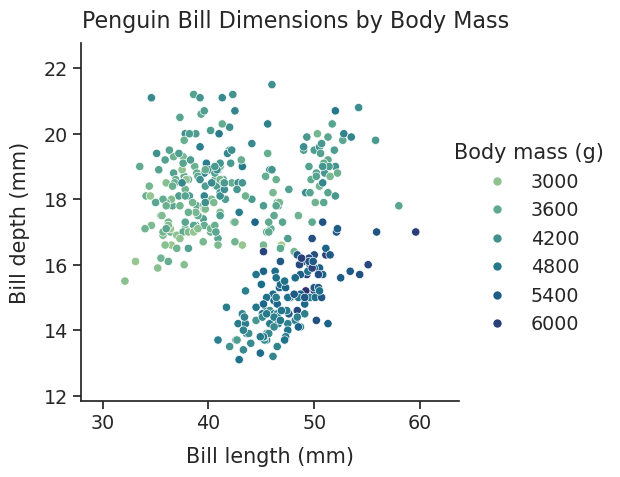

In [ ]:
#set the theme for the plot
sns.set_theme(style="ticks", font_scale=1.25)

#create a relational plot to show the relationship between bill length and bill depth, colored by body mass
g = sns.relplot(
    data=penguins,#set the data to the pandas DataFrame we just loaded
    x="bill_length_mm", y="bill_depth_mm", #set the x and y axes
    hue="body_mass_g",#set the hue based on the body mass column
    palette="crest", #set the color palette to crest
    marker="o", #set the marker style to x
    #set the marker size to flipper length divided by 10 for better visibility
    # size=penguins["flipper_length_mm"]/10,
    # sizes=(20, 200), #set the minimum and maximum marker sizes
)
#customize the axes and legend
g.set_axis_labels("Bill length (mm)", #set x axis label
                  "Bill depth (mm)", #set y axis label
                  labelpad=10 #set padding between labels and axes
                  )
#add plot title
g.legend.set_title("Body mass (g)") #set legend title
g.figure.set_size_inches(6.5, 4.5) #set figure size
g.ax.margins(.15) #set margins around the plot

#set the plot title, need to call the figure attribute of the relplot object
g.fig.suptitle("Penguin Bill Dimensions by Body Mass", #set the plot title
               fontsize=16, #set the font size
               y=1.03 #set the y position of the title
               )

## Relationship to matplotlib

Seaborn's integration with matplotlib allows you to use it across the many environments that matplotlib supports, including exploratory analysis in notebooks, real-time interaction in GUI applications, and archival output in a number of raster and vector formats.
While you can be productive using only seaborn functions, full customization of your graphics will require some knowledge of matplotlib's concepts and API. 

Lets move on to the next chapter, [Overview of Seaborn plotting functions](./function_overview.ipynb)